# Imports

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import chi2

from robpy.datasets import load_topgear
from robpy.covariance.cellmcd import CellMCDEstimator

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load and preprocess the data

I haven't used data_cleaner.py yet, in the PR of the demo notebooks some changes are made that are needed, but aren't merged yet.

In [11]:
data = load_topgear(as_frame=True)
car_models = data.data['Maker'] + data.data['Model']

clean_data = pd.DataFrame(data.data)
clean_data.drop(index = [69,95],inplace=True)
clean_data = clean_data.loc[:,['Price','Displacement', 'BHP', 'Torque','Acceleration', 'TopSpeed', 'MPG',
       'Weight', 'Length', 'Width', 'Height']]
car_models.drop([69, 95],inplace=True)
car_models = car_models.tolist()

for col in ['Displacement', 'BHP', 'Torque', 'TopSpeed']:
    clean_data[col] = np.log(clean_data[col])
clean_data['Price'] = np.log(clean_data['Price']/1000)

# CellMCD

In [12]:
cellmcd = CellMCDEstimator()
cellmcd.fit(clean_data.values)

array([[ 4.88926926e-01,  3.24019644e-01,  4.04799161e-01,
         3.42101967e-01, -1.90763115e+00,  1.21729618e-01,
        -8.32330288e+00,  1.92877470e+02,  2.14380638e+02,
         5.01732385e+01, -3.59457277e+01],
       [ 3.24019644e-01,  2.41078069e-01,  2.83298569e-01,
         2.39827241e-01, -1.30537791e+00,  7.96537952e-02,
        -6.17702745e+00,  1.41543062e+02,  1.48822879e+02,
         3.41869971e+01, -1.78404590e+01],
       [ 4.04799161e-01,  2.83298569e-01,  3.71825215e-01,
         2.94796581e-01, -1.83842160e+00,  1.10804307e-01,
        -8.00343448e+00,  1.56588775e+02,  1.74447259e+02,
         4.12302254e+01, -3.25741566e+01],
       [ 3.42101967e-01,  2.39827241e-01,  2.94796581e-01,
         3.05701316e-01, -1.41963735e+00,  8.47532754e-02,
        -5.29625322e+00,  1.76071719e+02,  1.95087785e+02,
         4.23815677e+01, -9.54573211e+00],
       [-1.90763115e+00, -1.30537791e+00, -1.83842160e+00,
        -1.41963735e+00,  1.01770373e+01, -5.96411938e-01,
  

We focus on the variable 'Price' and make several diagnostic plots.

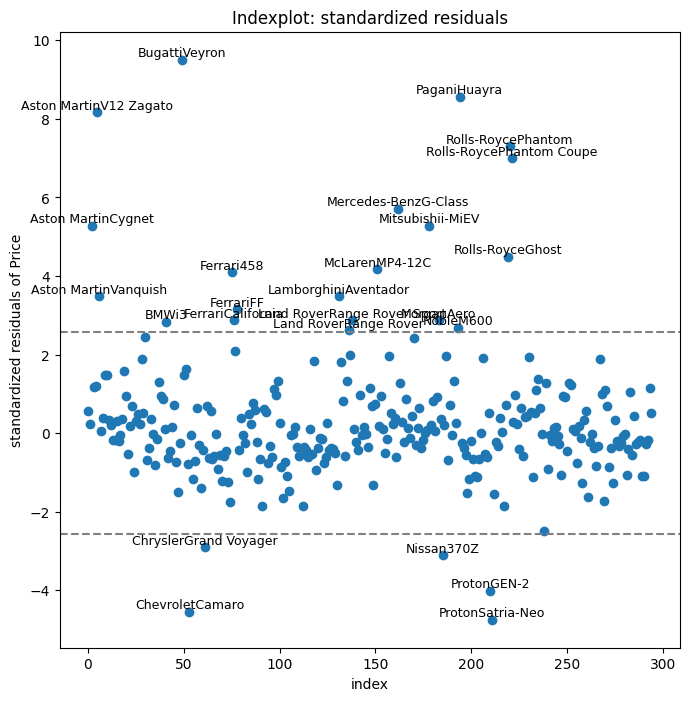

In [13]:
variable = 0
variable_name = "Price"
cellmcd.cell_MCD_plot(
    variable=variable, variable_name=variable_name, row_names=car_models, plottype="indexplot"
)
plt.show()

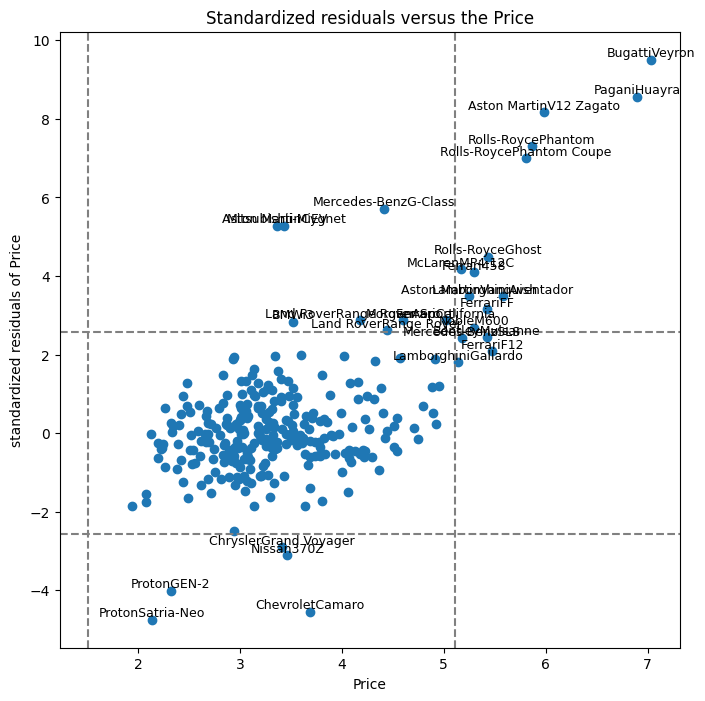

In [14]:
cellmcd.cell_MCD_plot(
    variable=variable,
    variable_name=variable_name,
    row_names=car_models,
    plottype="residuals_vs_variable",
)
plt.show()

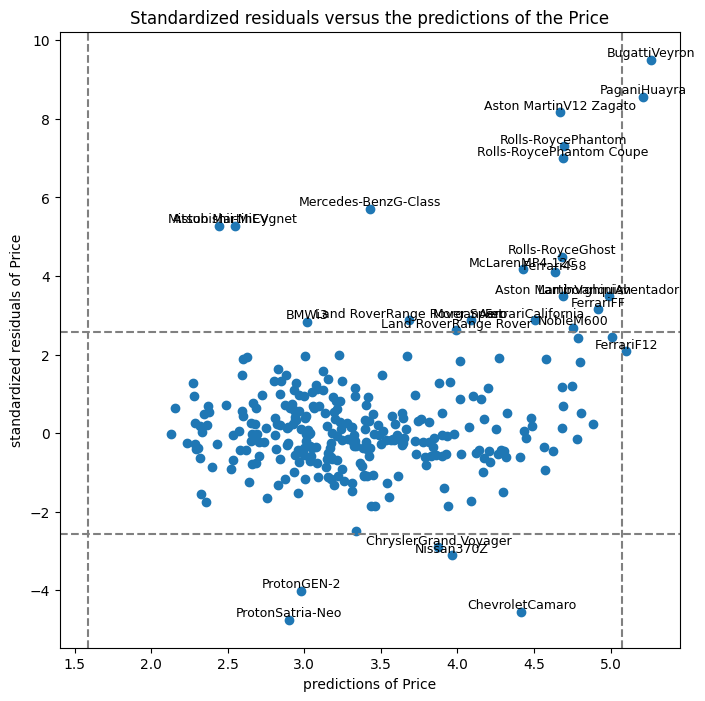

In [15]:
cellmcd.cell_MCD_plot(
    variable=variable,
    variable_name=variable_name,
    row_names=car_models,
    plottype="residuals_vs_predictions",
)
plt.show()

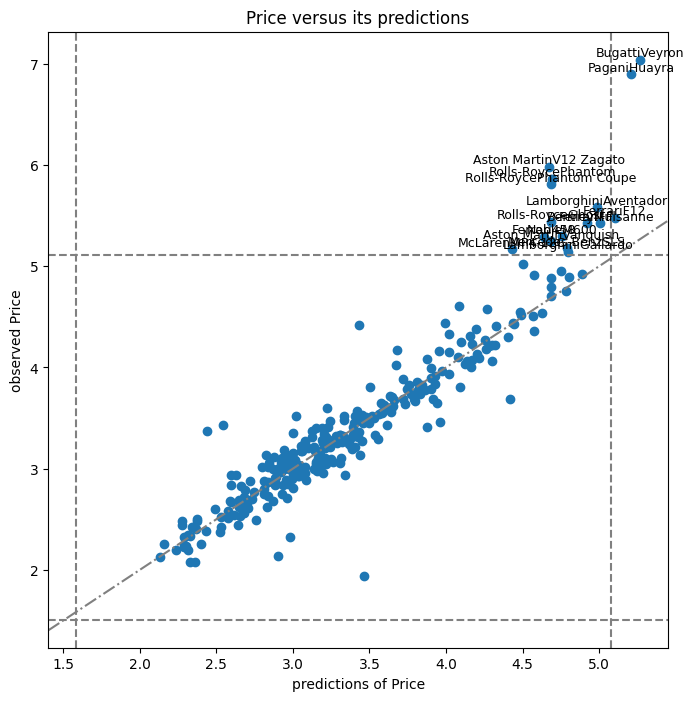

In [16]:
cellmcd.cell_MCD_plot(
    variable=variable,
    variable_name=variable_name,
    row_names=car_models,
    plottype="variable_vs_predictions",
)
plt.show()

Next we look at the interaction between the variable 'Price' and the variable 'Acceleration'.

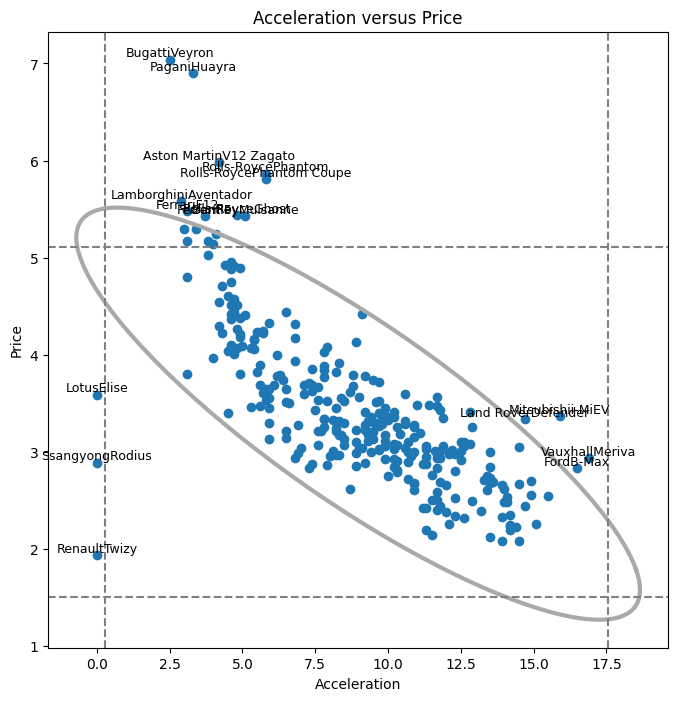

In [17]:
second_variable = 4
second_variable_name = "Acceleration"
cellmcd.cell_MCD_plot(
    second_variable,second_variable_name,car_models,variable,variable_name,"bivariate",
)
plt.show()